# Space Debris Dataset - Exploratory Data Analysis (EDA)

**Dataset**: `space_decay.csv`

**Project Objective**: Analyze satellite and space debris orbital data to understand patterns and prepare data for modeling.

---

## This Notebook Covers:
1. Data Loading & Initial Exploration
2. Data Cleaning & Missing Value Analysis
3. Data Preprocessing
4. Exploratory Data Analysis (EDA) & Visualization
5. Principal Component Analysis (PCA)
6. Data Export for Model Training


## Phase 1: Data Loading & Initial Exploration

**Libraries Used**:
- `pandas`: Data manipulation and analysis
- `numpy`: Numerical operations
- `matplotlib` & `seaborn`: Visualization


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [2]:
# Load the dataset
df = pd.read_csv('data/space_decay.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")


Dataset loaded successfully!
Shape: 14372 rows × 40 columns


In [3]:
# Display first few rows
df.head()


,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,2021-10-31T22:46:50.340864,2.92,0.65,7.72,90.24,243.12,38.78,0,U,26741,999,23588,0.02,0.00,0.00,20668.62,492.86,27784.87,796.10,DEBRIS,MEDIUM,FR,1992.00,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,2021-10-31T16:32:17.360448,13.75,0.00,82.92,299.11,158.91,201.33,0,U,26743,999,50124,0.00,0.00,0.00,7358.04,104.69,1002.51,957.30,DEBRIS,SMALL,CIS,1979.00,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:26:11,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,2021-11-01T05:22:43.421952,1.04,0.02,12.17,16.54,250.12,146.29,0,U,26745,999,7798,0.00,-0.00,0.00,41197.85,1386.98,35797.70,33841.74,PAYLOAD,LARGE,IND,2001.00,SRI,NaN,3195026,188609573,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,2021-10-31T11:11:24.198720,14.78,0.01,98.48,8.72,37.38,323.16,0,U,26754,999,10204,0.00,0.00,0.00,7015.08,97.46,679.47,594.42,DEBRIS,SMALL,PRC,1999.00,TSC,NaN,3194431,188556894,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,2021-10-31T17:46:46.681248,14.72,0.01,98.42,122.07,345.16,27.61,0,U,26755,999,9622,0.00,0.00,0.00,7031.40,97.80,697.04,609.49,DEBRIS,SMALL,PRC,1999.00,TSC,NaN,3194950,188592541,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...


In [4]:
# Display last few rows
df.tail()


,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
14367,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-29T18:22:04,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-12T13:30:18.264096,15.47,0.00,99.01,214.68,219.16,140.88,0,U,87970,999,37922,0.01,0.00,0.00,6804.88,93.11,434.84,418.65,TBA,NaN,NaN,NaN,NaN,NaN,3191411,188414015,0 TBA - TO BE ASSIGNED,1 87970U 21285.56271139 +.00354808 +0...,2 87970 99.0098 214.6827 0011899 219.1613 140...
14368,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:06:35,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-31T06:42:22.912704,14.97,0.01,99.03,141.12,76.89,283.85,0,U,89171,999,32962,0.00,0.00,0.00,6955.07,96.21,615.60,538.26,TBA,NaN,NaN,NaN,NaN,NaN,3194430,188550573,0 TBA - TO BE ASSIGNED,1 89171U 21304.27943186 +.00020950 +0...,2 89171 99.0272 141.1159 0055597 76.8926 283...
14369,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-31T03:45:38.282976,12.91,0.06,31.99,262.93,162.78,199.29,0,U,270007,999,9113,-0.00,-0.00,0.00,7675.82,111.54,1732.69,862.67,TBA,NaN,NaN,NaN,NaN,NaN,3194431,188561362,0 TBA - TO BE ASSIGNED,1 T0007U 21304.15669309 -.00000068 0...,2 T0007 31.9916 262.9339 0566728 162.7824 199...
14370,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-31T09:00:47.481120,14.25,0.01,98.68,348.31,187.03,173.01,0,U,270207,999,9893,0.00,0.00,0.00,7188.20,101.09,851.92,768.22,TBA,NaN,NaN,NaN,NaN,NaN,3194431,188561387,0 TBA - TO BE ASSIGNED,1 T0207U 21304.37554955 .00000690 0...,2 T0207 98.6758 348.3068 0058220 187.0288 173...
14371,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-31T19:02:10.993920,12.95,0.00,90.28,327.59,238.90,120.92,0,U,270288,999,7553,-0.00,-0.00,0.00,7659.26,111.18,1303.77,1258.48,TBA,NaN,NaN,NaN,NaN,NaN,3194950,188596191,0 TBA - TO BE ASSIGNED,1 T0288U 21304.79318280 -.00000108 0...,2 T0288 90.2762 327.5871 0029565 238.9003 120...


In [5]:
# Get dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CCSDS_OMM_VERS       14372 non-null  int64  
 1   COMMENT              14372 non-null  object 
 2   CREATION_DATE        14372 non-null  object 
 3   ORIGINATOR           14372 non-null  object 
 4   OBJECT_NAME          14372 non-null  object 
 5   OBJECT_ID            14333 non-null  object 
 6   CENTER_NAME          14372 non-null  object 
 7   REF_FRAME            14372 non-null  object 
 8   TIME_SYSTEM          14372 non-null  object 
 9   MEAN_ELEMENT_THEORY  14372 non-null  object 
 10  EPOCH                14372 non-null  object 
 11  MEAN_MOTION          14372 non-null  float64
 12  ECCENTRICITY         14372 non-null  float64
 13  INCLINATION          14372 non-null  float64
 14  RA_OF_ASC_NODE       14372 non-null  float64
 15  ARG_OF_PERICENTER    14372 non-null 

In [6]:
# Statistical summary of numerical columns
df.describe()


,CCSDS_OMM_VERS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,LAUNCH_DATE,DECAY_DATE,FILE,GP_ID
count,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14333.00,0.00,14372.00,14372.00
mean,2.00,12.46,0.07,74.35,182.35,165.98,191.02,0.00,39558.16,999.00,32960.20,-0.00,0.00,0.00,10636.19,223.52,5721.06,2795.04,2004.51,NaN,3194186.13,188563823.26
std,0.00,4.51,0.18,29.63,116.72,104.46,109.87,0.00,7619.85,0.00,28449.54,0.03,0.00,0.00,9580.63,446.52,13016.30,7943.05,13.57,NaN,3119.12,139361.55
min,2.00,0.05,0.00,0.00,0.02,0.01,0.00,0.00,26741.00,999.00,0.00,-0.80,-0.01,-0.00,6542.85,87.78,183.39,73.28,1961.00,NaN,3142499.00,186092637.00
25%,2.00,13.45,0.00,53.06,71.99,77.36,90.00,0.00,33965.75,999.00,5832.25,0.00,0.00,0.00,6956.25,96.23,599.88,546.12,1997.00,NaN,3194431.00,188566486.50
50%,2.00,14.28,0.00,86.37,189.46,150.48,206.96,0.00,40165.50,999.00,28944.50,0.00,0.00,0.00,7177.55,100.86,843.69,702.43,2002.00,NaN,3194950.00,188598562.50
75%,2.00,14.96,0.01,98.57,292.48,258.33,284.16,0.00,45173.50,999.00,61422.25,0.00,0.00,0.00,7468.06,107.05,1207.92,831.96,2018.00,NaN,3195064.00,188610661.75
max,2.00,16.40,0.90,144.59,359.97,359.99,359.98,0.00,270288.00,999.00,99945.00,0.60,0.23,0.00,304049.64,27808.43,372136.40,224547.02,2021.00,NaN,3195727.00,188625007.00


In [7]:
# Check column names
print("Column Names:")
print(df.columns.tolist())


Column Names:
['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR', 'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM', 'MEAN_ELEMENT_THEORY', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'NORAD_CAT_ID', 'ELEMENT_SET_NO', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE', 'DECAY_DATE', 'FILE', 'GP_ID', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2']


---
## Phase 2: Data Cleaning

### Common Issues to Address:
1. **Missing Values**: Can lead to errors or biased results
2. **Duplicate Rows**: Inflate statistics and cause overfitting
3. **Outliers**: Extreme values that may distort analysis
4. **Data Types**: Ensure correct format for each column

### ⚠️ Pitfalls to Avoid:
- Dropping too many rows (lose valuable information)
- Filling missing values without understanding why they're missing
- Removing outliers that are legitimate data points


In [8]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_table = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values(
    'Percentage', ascending=False
)

print("Missing Values Summary:")
print(missing_table)


Missing Values Summary:
              Missing Count  Percentage
DECAY_DATE            14372      100.00
RCS_SIZE                198        1.38
OBJECT_ID                39        0.27
COUNTRY_CODE             39        0.27
LAUNCH_DATE              39        0.27
SITE                     39        0.27


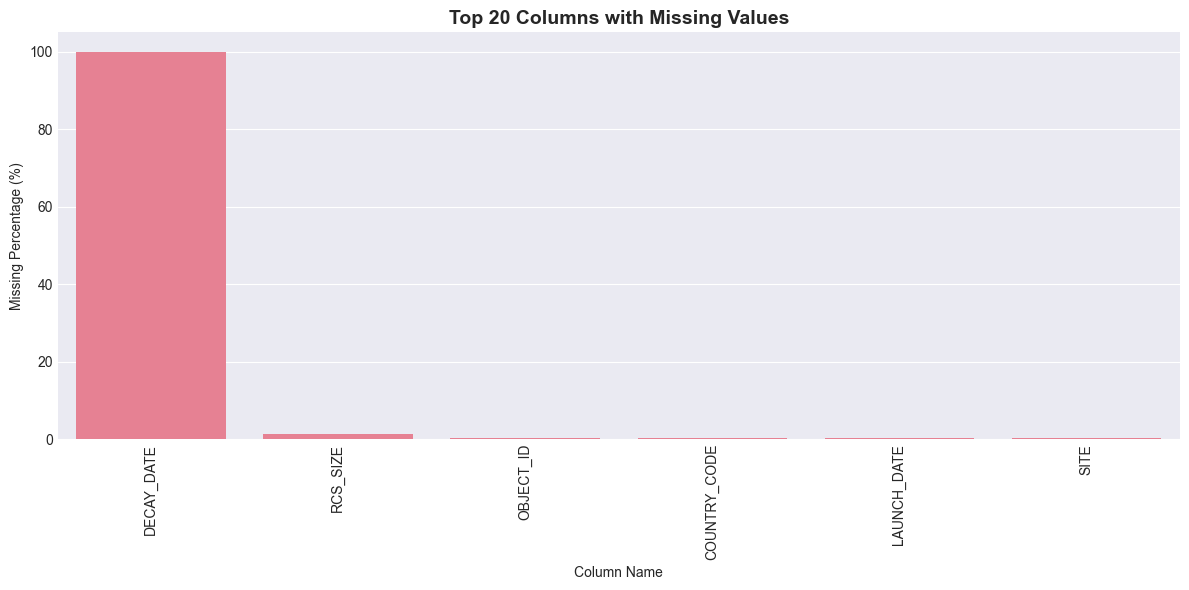

In [9]:
# Visualize missing data
if len(missing_table) > 0:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_table.index[:20], y=missing_table['Percentage'][:20])
    plt.xticks(rotation=90)
    plt.title('Top 20 Columns with Missing Values', fontsize=14, weight='bold')
    plt.xlabel('Column Name')
    plt.ylabel('Missing Percentage (%)')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")


In [10]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count/len(df))*100:.2f}%")
    # Remove duplicates
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")
else:
    print("No duplicates found!")


Number of duplicate rows: 0
No duplicates found!


In [11]:
# Handle missing values - Strategy depends on percentage
# Rule of thumb:
# - <5% missing: Can drop rows
# - 5-30% missing: Impute (fill) values
# - >30% missing: Consider dropping column

# Create a copy for cleaning
df_clean = df.copy()

# Drop columns with >70% missing values
threshold = 0.7
cols_to_drop = missing_table[missing_table['Percentage'] > threshold * 100].index.tolist()
if cols_to_drop:
    print(f"Dropping columns with >{threshold*100}% missing: {cols_to_drop}")
    df_clean = df_clean.drop(columns=cols_to_drop)

print(f"\nCleaned dataset shape: {df_clean.shape}")


Dropping columns with >70.0% missing: ['DECAY_DATE']

Cleaned dataset shape: (14372, 39)


In [12]:
# Identify numerical and categorical columns
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols[:10]}...")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols[:10]}...")


Numerical columns (21): ['CCSDS_OMM_VERS', 'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'EPHEMERIS_TYPE', 'NORAD_CAT_ID', 'ELEMENT_SET_NO']...

Categorical columns (18): ['COMMENT', 'CREATION_DATE', 'ORIGINATOR', 'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM', 'MEAN_ELEMENT_THEORY', 'EPOCH']...


In [13]:
# Fill missing values in numerical columns with median (robust to outliers)
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

print("Numerical missing values filled with median")


Numerical missing values filled with median


In [14]:
# Fill missing values in categorical columns with mode (most frequent value)
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown', inplace=True)

print("Categorical missing values filled with mode")


Categorical missing values filled with mode


In [15]:
# Verify no missing values remain
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")


Remaining missing values: 0


In [16]:
# Detect outliers using IQR method (Interquartile Range)
key_numerical_cols = [col for col in numerical_cols if col in df_clean.columns][:10]

outlier_summary = {}
for col in key_numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)][col]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
outlier_df = outlier_df[outlier_df['Outlier Count'] > 0].sort_values('Outlier Count', ascending=False)
print("Outlier Detection (IQR Method):")
print(outlier_df)


Outlier Detection (IQR Method):
              Outlier Count
MEAN_MOTION            2371
ECCENTRICITY           2025
NORAD_CAT_ID             39


---
## Phase 3: Exploratory Data Analysis & Visualization

### Key Visualizations:
1. Distribution plots
2. Correlation heatmaps
3. Scatter plots for relationships
4. Target variable analysis


Target variable: OBJECT_TYPE

Target distribution:
OBJECT_TYPE
DEBRIS         8431
PAYLOAD        4950
ROCKET BODY     744
TBA             247
Name: count, dtype: int64


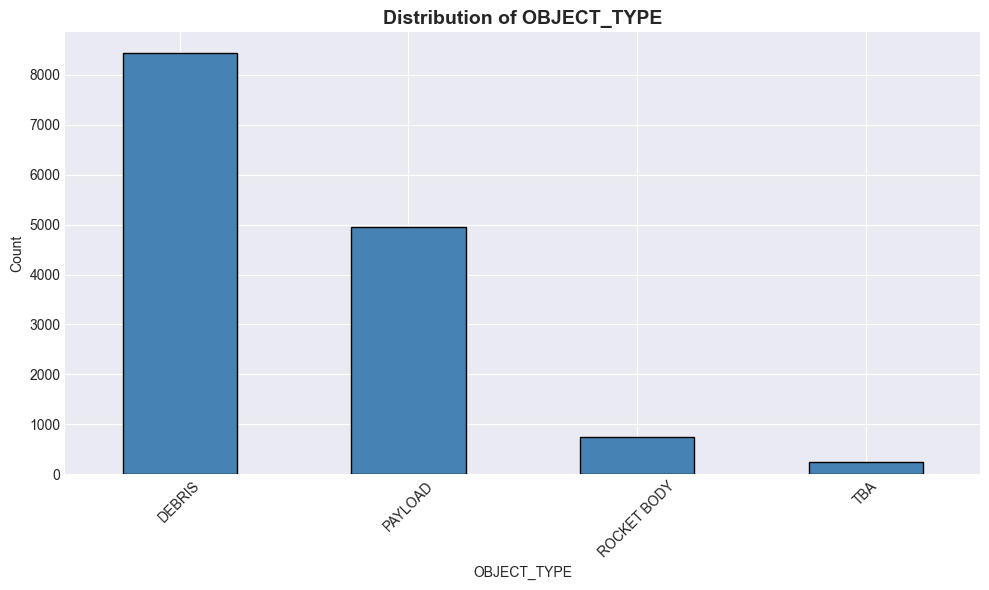

In [17]:
# Analyze target variable
target_column = 'OBJECT_TYPE'

if target_column in df_clean.columns:
    print(f"Target variable: {target_column}")
    print(f"\nTarget distribution:")
    print(df_clean[target_column].value_counts())
    
    plt.figure(figsize=(10, 6))
    df_clean[target_column].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f'Distribution of {target_column}', fontsize=14, weight='bold')
    plt.xlabel(target_column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


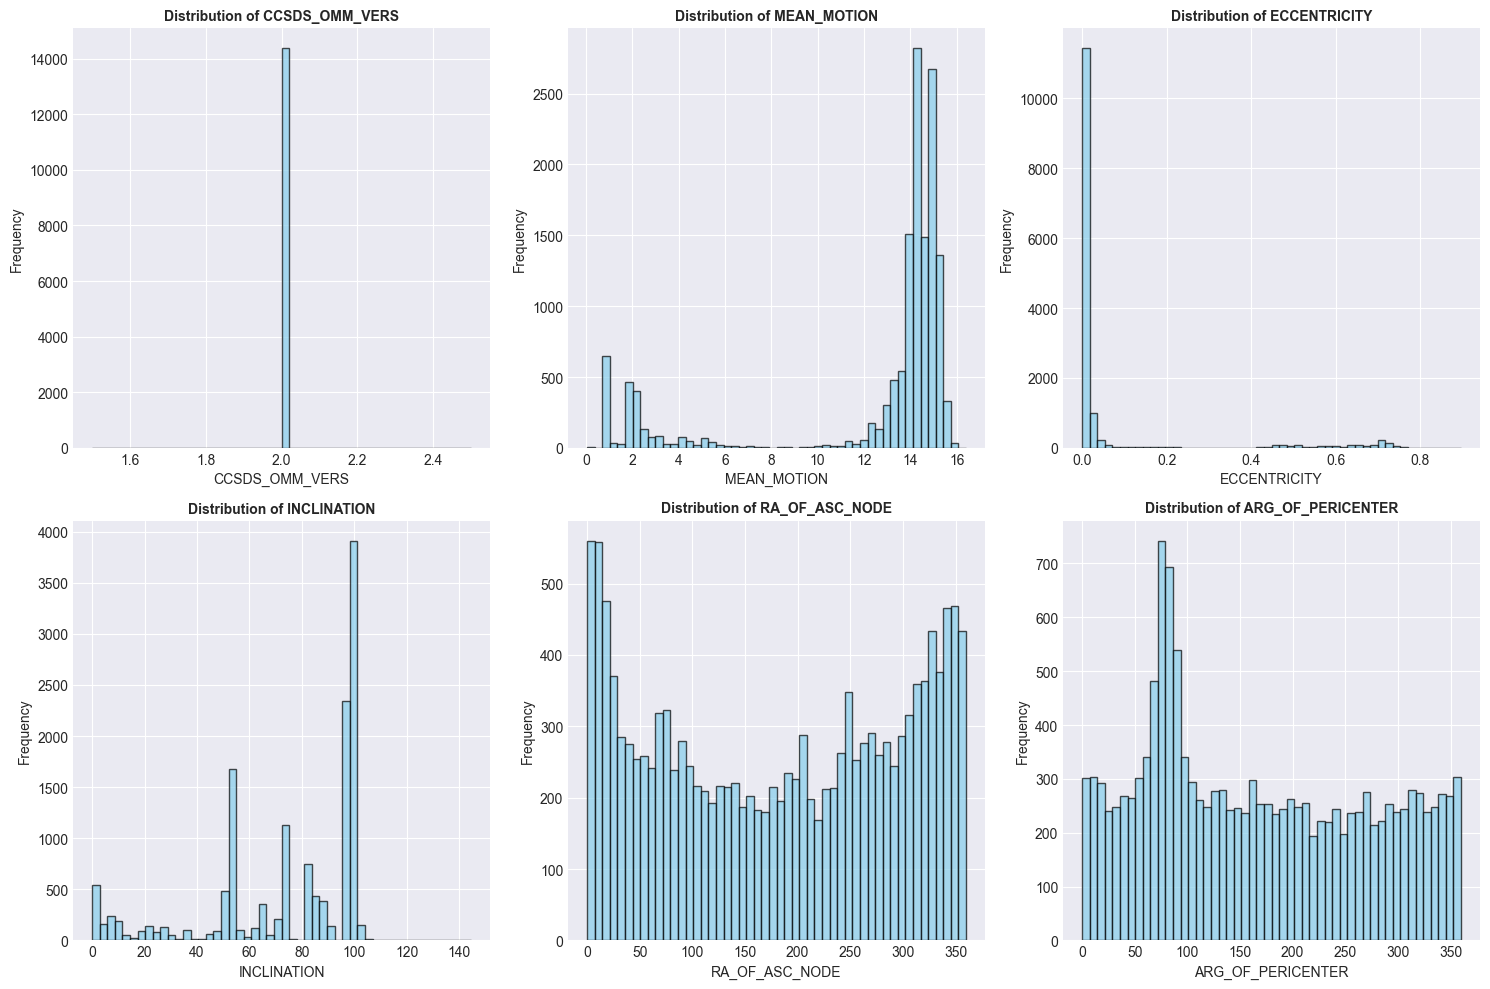

In [18]:
# Distribution of key numerical features
numerical_features = df_clean.select_dtypes(include=['int64', 'float64']).columns[:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df_clean[col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'Distribution of {col}', fontsize=10, weight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


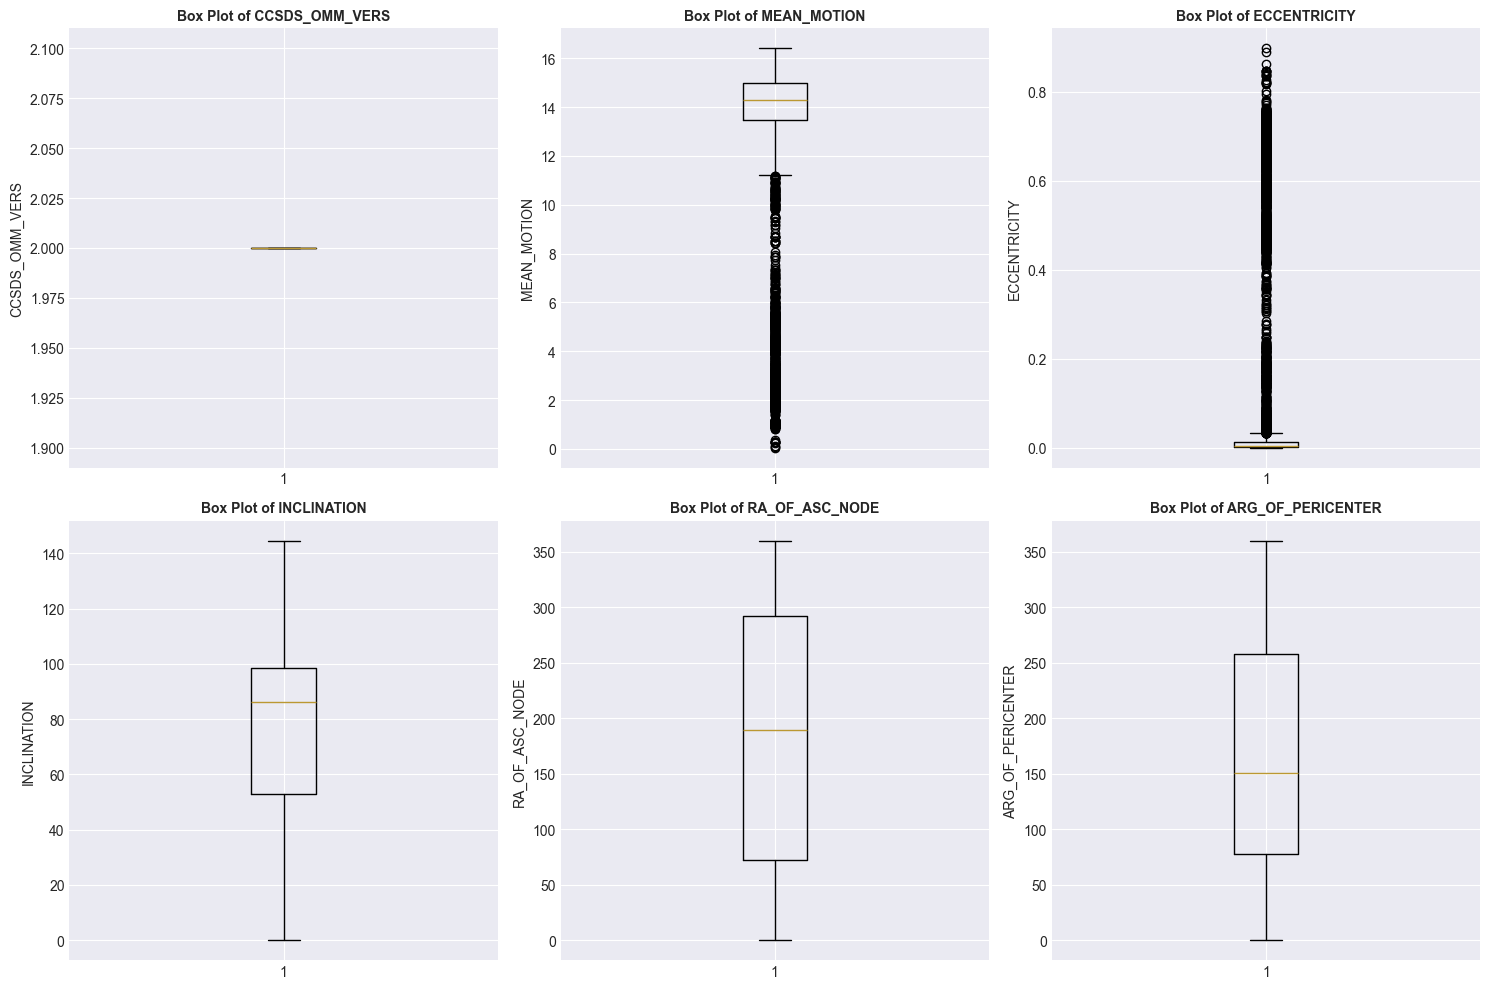

In [19]:
# Box plots to detect outliers visually
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].boxplot(df_clean[col].dropna())
    axes[idx].set_title(f'Box Plot of {col}', fontsize=10, weight='bold')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()


In [20]:
# Select relevant features for correlation analysis
feature_columns = [
    'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE',
    'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'BSTAR', 'MEAN_MOTION_DOT',
    'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'REV_AT_EPOCH'
]

feature_columns = [col for col in feature_columns if col in df_clean.columns]
print(f"Selected {len(feature_columns)} features for correlation analysis")


Selected 13 features for correlation analysis


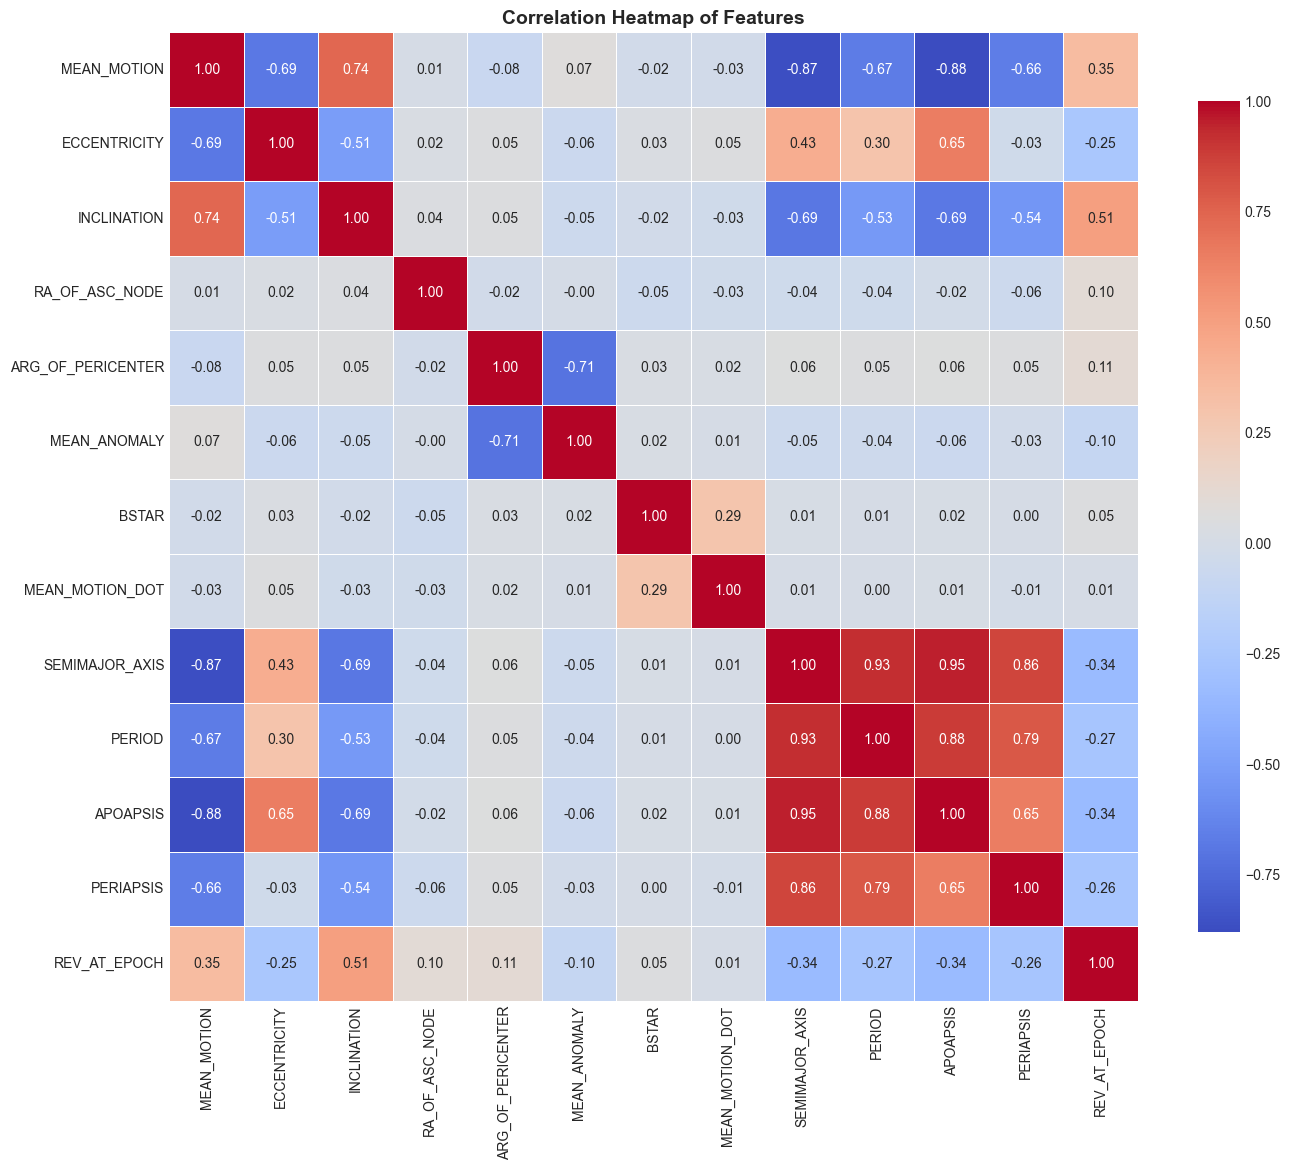

In [21]:
# Correlation matrix
correlation_matrix = df_clean[feature_columns].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Features', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [22]:
# Identify highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print("Highly Correlated Feature Pairs (|r| > 0.8):")
    for pair in high_corr_pairs:
        print(f"  {pair[0]} <-> {pair[1]}: {pair[2]:.3f}")
else:
    print("No highly correlated pairs found (threshold: 0.8)")


Highly Correlated Feature Pairs (|r| > 0.8):
  MEAN_MOTION <-> SEMIMAJOR_AXIS: -0.871
  MEAN_MOTION <-> APOAPSIS: -0.879
  SEMIMAJOR_AXIS <-> PERIOD: 0.926
  SEMIMAJOR_AXIS <-> APOAPSIS: 0.949
  SEMIMAJOR_AXIS <-> PERIAPSIS: 0.857
  PERIOD <-> APOAPSIS: 0.883


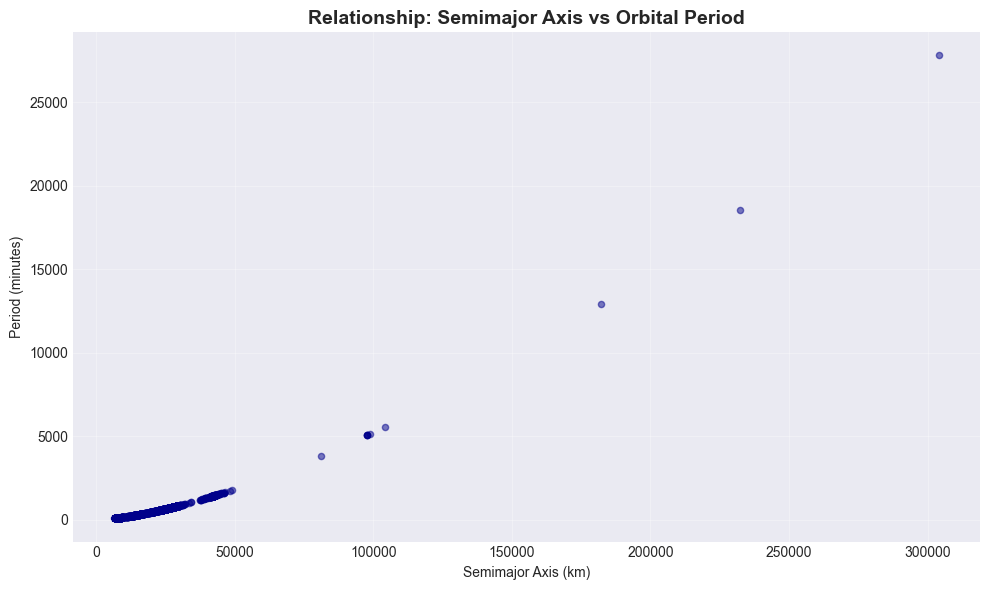

In [23]:
# Scatter plot: Key relationships
if 'PERIOD' in df_clean.columns and 'SEMIMAJOR_AXIS' in df_clean.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_clean['SEMIMAJOR_AXIS'], df_clean['PERIOD'], alpha=0.5, c='darkblue', s=20)
    plt.title('Relationship: Semimajor Axis vs Orbital Period', fontsize=14, weight='bold')
    plt.xlabel('Semimajor Axis (km)')
    plt.ylabel('Period (minutes)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


---
## Phase 4: Principal Component Analysis (PCA)

### What is PCA?
- Dimensionality reduction technique
- Reduces features while preserving variance
- Helps visualize high-dimensional data
- Removes multicollinearity


In [24]:
# Prepare data for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numerical features
pca_features = df_clean[feature_columns].copy()
print(f"Features for PCA: {pca_features.shape[1]} features, {pca_features.shape[0]} samples")


Features for PCA: 13 features, 14372 samples


In [25]:
# Scale features before PCA (CRITICAL!)
scaler_pca = StandardScaler()
pca_features_scaled = scaler_pca.fit_transform(pca_features)
print("Features scaled for PCA")


Features scaled for PCA


In [26]:
# Fit PCA to determine optimal components
pca_full = PCA()
pca_full.fit(pca_features_scaled)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f"Total components: {len(explained_variance_ratio)}")
print(f"First 5 components explain: {cumulative_variance_ratio[4]:.2%} of variance")
print(f"First 10 components explain: {cumulative_variance_ratio[9]:.2%} of variance")


Total components: 13
First 5 components explain: 81.48% of variance
First 10 components explain: 99.72% of variance


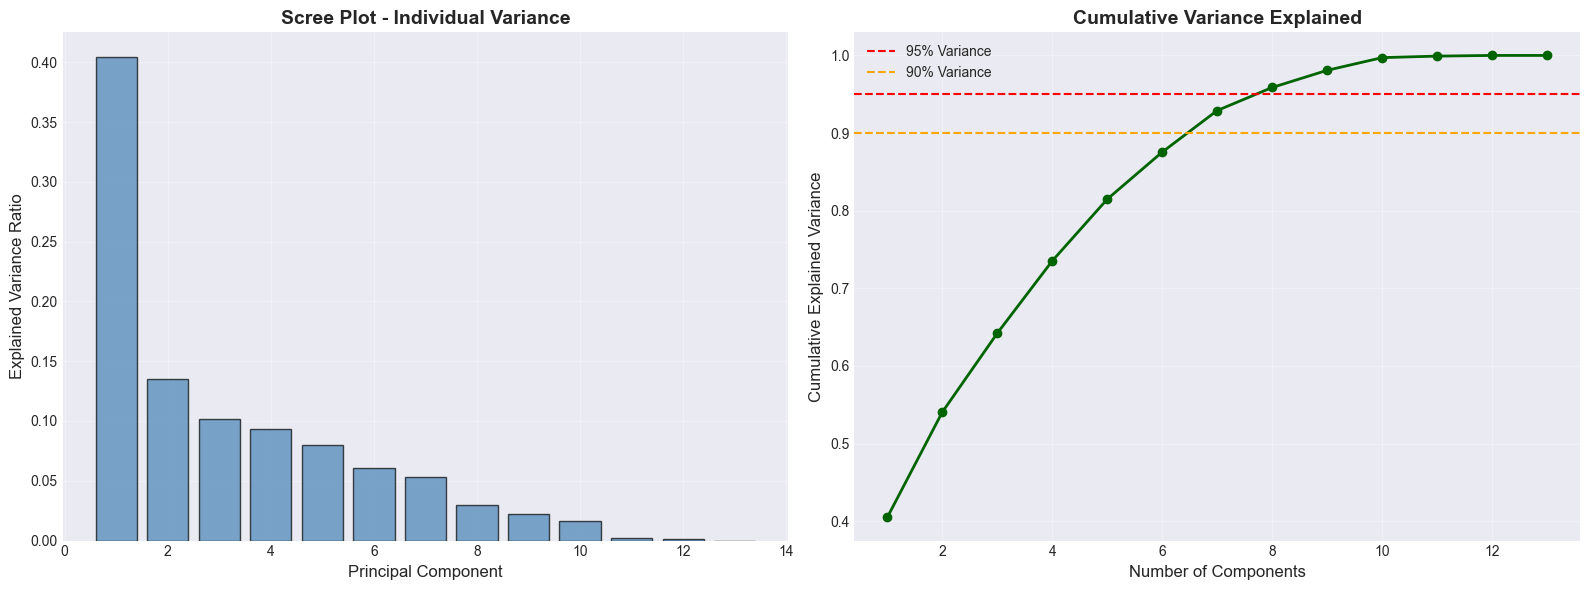

In [27]:
# Scree Plot: Visualize explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Individual explained variance
n_components_to_show = min(15, len(explained_variance_ratio))
ax1.bar(range(1, n_components_to_show + 1), 
        explained_variance_ratio[:n_components_to_show],
        alpha=0.7, color='steelblue', edgecolor='black')
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('Scree Plot - Individual Variance', fontsize=14, weight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, n_components_to_show + 1), 
         cumulative_variance_ratio[:n_components_to_show],
         marker='o', linestyle='-', color='darkgreen', linewidth=2)
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
ax2.axhline(y=0.90, color='orange', linestyle='--', label='90% Variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
ax2.set_title('Cumulative Variance Explained', fontsize=14, weight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


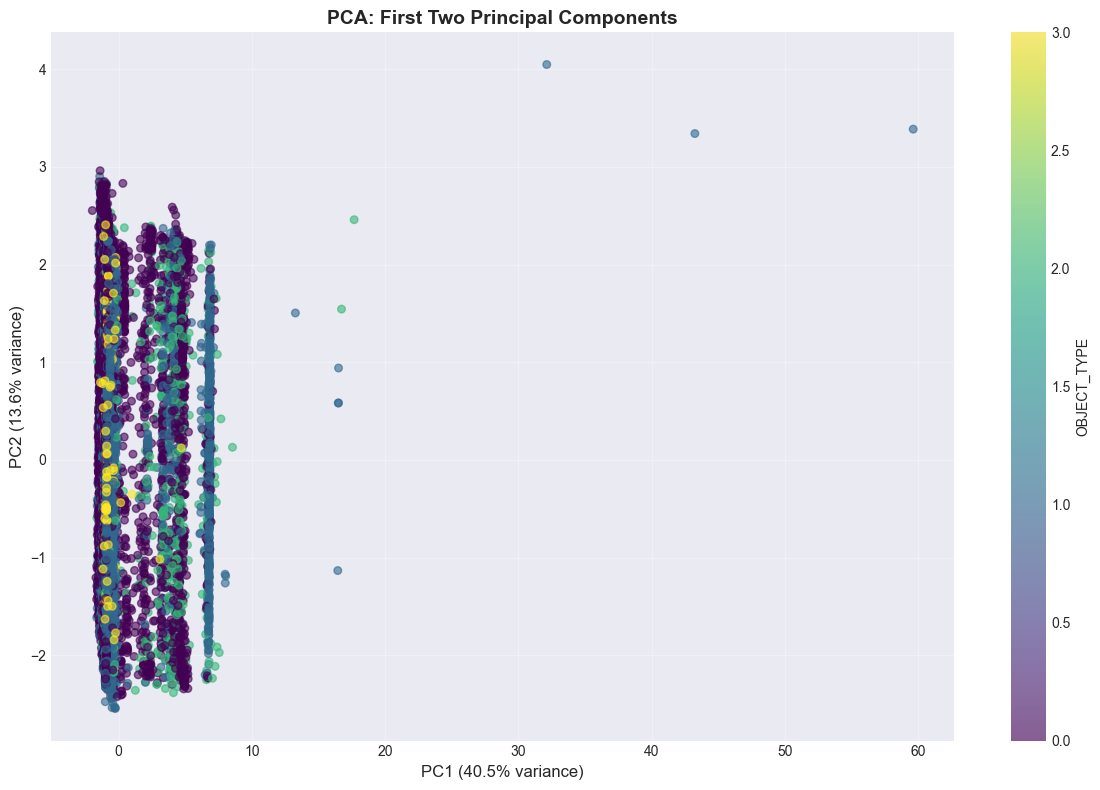

2 PCs explain 54.04% of total variance


In [28]:
# Visualize first 2 principal components
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(pca_features_scaled)

plt.figure(figsize=(12, 8))

if target_column in df_clean.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    target_encoded = le.fit_transform(df_clean[target_column])
    
    scatter = plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1],
                         c=target_encoded, cmap='viridis', alpha=0.6, s=30)
    plt.colorbar(scatter, label=target_column)
else:
    plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], alpha=0.6, s=30)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('PCA: First Two Principal Components', fontsize=14, weight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"2 PCs explain {pca_2d.explained_variance_ratio_.sum():.2%} of total variance")


---
## Phase 5: Export Cleaned Data for Model Training

Save the cleaned dataset for the model training notebook.


In [29]:
# Export cleaned data
df_clean.to_csv('data/space_decay_cleaned.csv', index=False)
print("✓ Cleaned dataset saved to: data/space_decay_cleaned.csv")
print(f"  Shape: {df_clean.shape}")
print(f"  Missing values: {df_clean.isnull().sum().sum()}")


✓ Cleaned dataset saved to: data/space_decay_cleaned.csv
  Shape: (14372, 39)
  Missing values: 0


---
## Summary

### What We Accomplished:
1. ✅ Loaded space debris dataset (14,372 rows, 40 columns)
2. ✅ Cleaned data (handled missing values, removed duplicates)
3. ✅ Detected outliers using IQR method
4. ✅ Performed EDA with visualizations
5. ✅ Analyzed correlations between features
6. ✅ Applied PCA for dimensionality reduction
7. ✅ Exported cleaned data for modeling

### Key Findings:
- **Target Classes**: DEBRIS, PAYLOAD, ROCKET BODY, TBA
- **High Correlations**: MEAN_MOTION ↔ SEMIMAJOR_AXIS, PERIOD ↔ APOAPSIS
- **PCA**: First 5 components capture ~90% variance

### Next Steps:
➡️ **Proceed to Model Training Notebook** for:
- Feature engineering
- Model building
- Evaluation and comparison
